#YOLO Training express
Este notebook es un tutorial sencillo para entrenar una red YOLO utilizando los recursos de Google Colab.

#Configuración del entorno

1. Es recomendable vincular nuestro Google Drive en caso de tener un dataset personalizado en nuestra nube.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Verificamos el directorio de trabajo actual para poder organizarnos mejor.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


3. Instalamos la paquetería de Ultralytics, esto hará el entrenamieto mucho más intuitivo y fácil.

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


3. Importamos las librerías necesarias.

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# Dataset

En caso de que necesitemos descargar un dataset de roboflow:

Para obtener este código solo necesitaremos ir a la página, clickear en el dataset deseado, clickear en "descargar" y obtener el código de descarga, el cual ya incluirá el API key.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API-KEY")
project = rf.workspace("inplayin").project("football-goalpost")
version = project.version(3)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Football-Goalpost-3 in yolov8:: 100%|██████████| 3910/3910 [00:01<00:00, 2083.61it/s]


En caso de que tengamos un dataset en Drive, simplemente debemos especificar la ruta al archivo data.yaml al momento del entrenamiento.

**Dataset cajas**: https://drive.google.com/drive/folders/1JNIlpigx-vCLZOB-r7Eh_ys76qlZg5rE?usp=sharing

**Dataset Pallets**: https://drive.google.com/drive/folders/1gwK9x-KVm4s-tgW7Ea2RjmM7U8n-3VEG?usp=sharing

# Entrenamiento

Ultralytics nos proporciona una sencilla manera de entrenar el modelo, pues con un simple comando se puede realizar un Transfer Learning con cualquiera de los modelos proporcionados por Ultralytics.

Este comando tiene un sinfín de parámetros modificables para ajustar el entrenamiento a cualquier dataset al que queramos adaptar el modelo.

Para más información podemos consultar: https://docs.ultralytics.com/modes/train/#train-settings

In [ ]:
# Entrenar YOLO
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data=/content/drive/MyDrive/Modelo_Bimbo/Dataset_cajas/data.yaml epochs=100 imgsz=640 plots=True patience=10 batch=8

/content
100% 6.25M/6.25M [00:00<00:00, 358MB/s]
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Modelo_Bimbo/Dataset_cajas/data.yaml, epochs=100, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fals

#Métricas

Para medir el rendimiento de nuestro modelo podemos obtener la matriz de confusión y las curvas de aprendizaje, las cuales estarán en la carpeta "runs" creada durante el entrenamiento.

/content


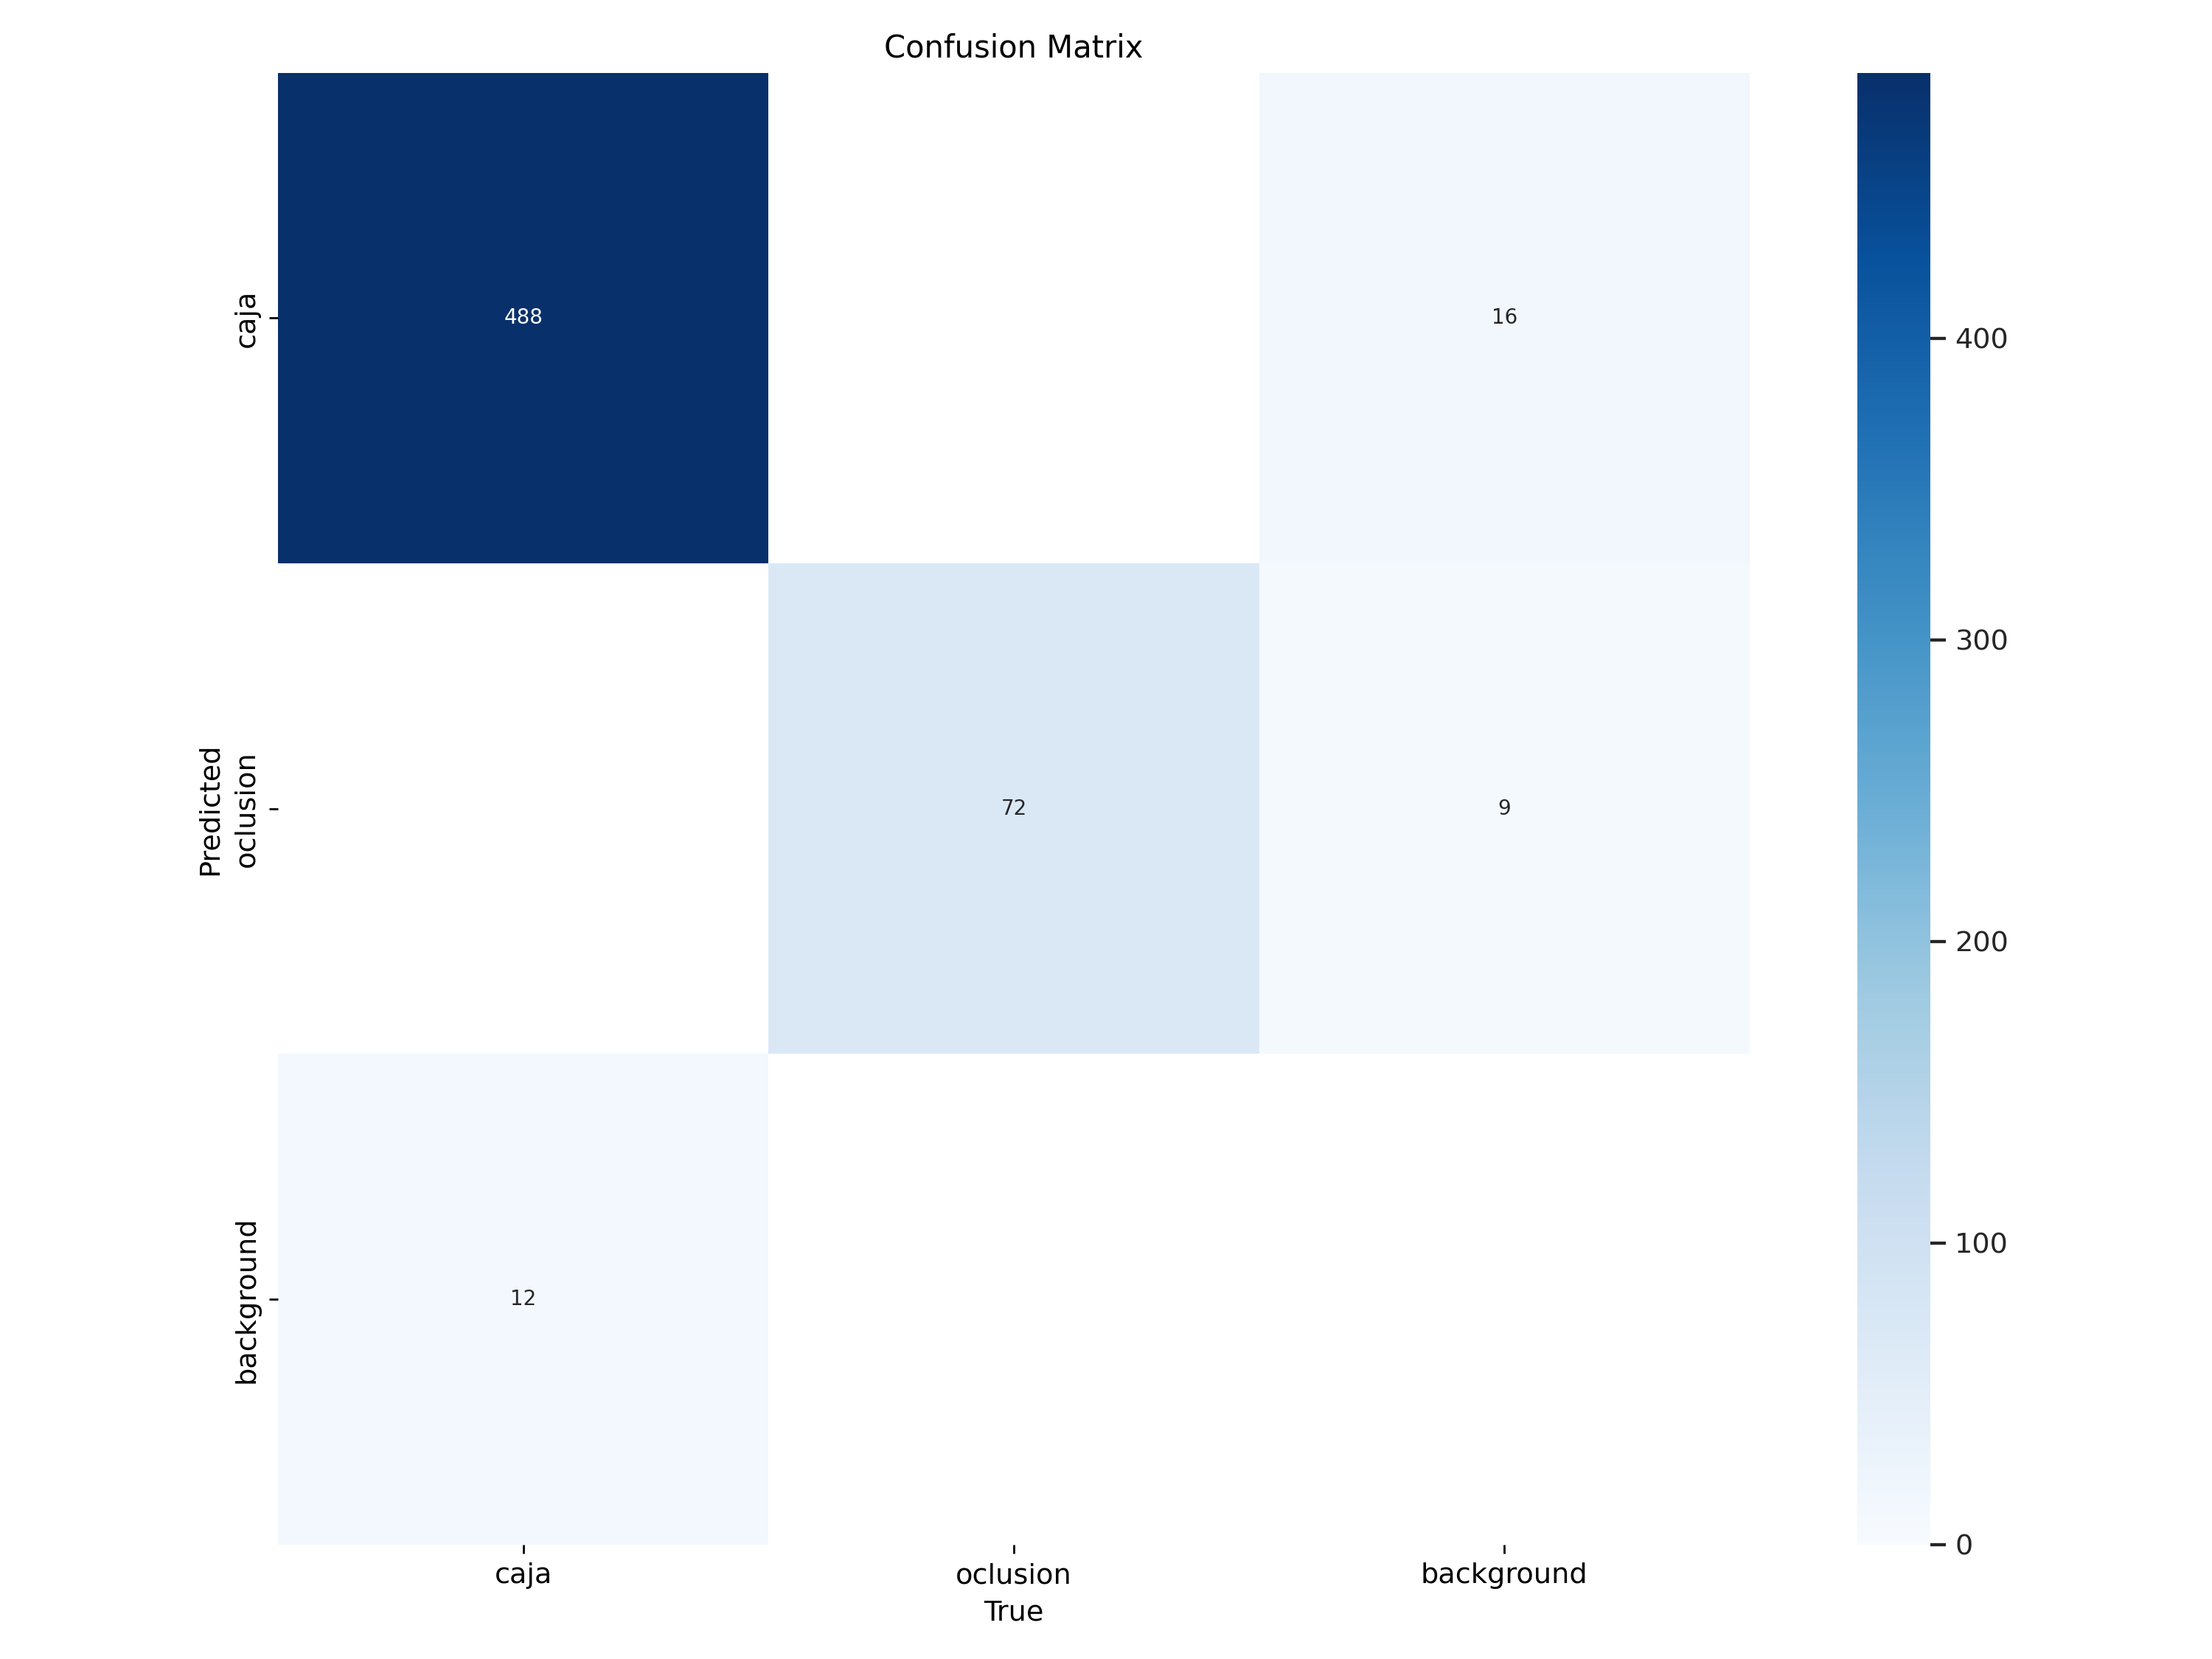

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


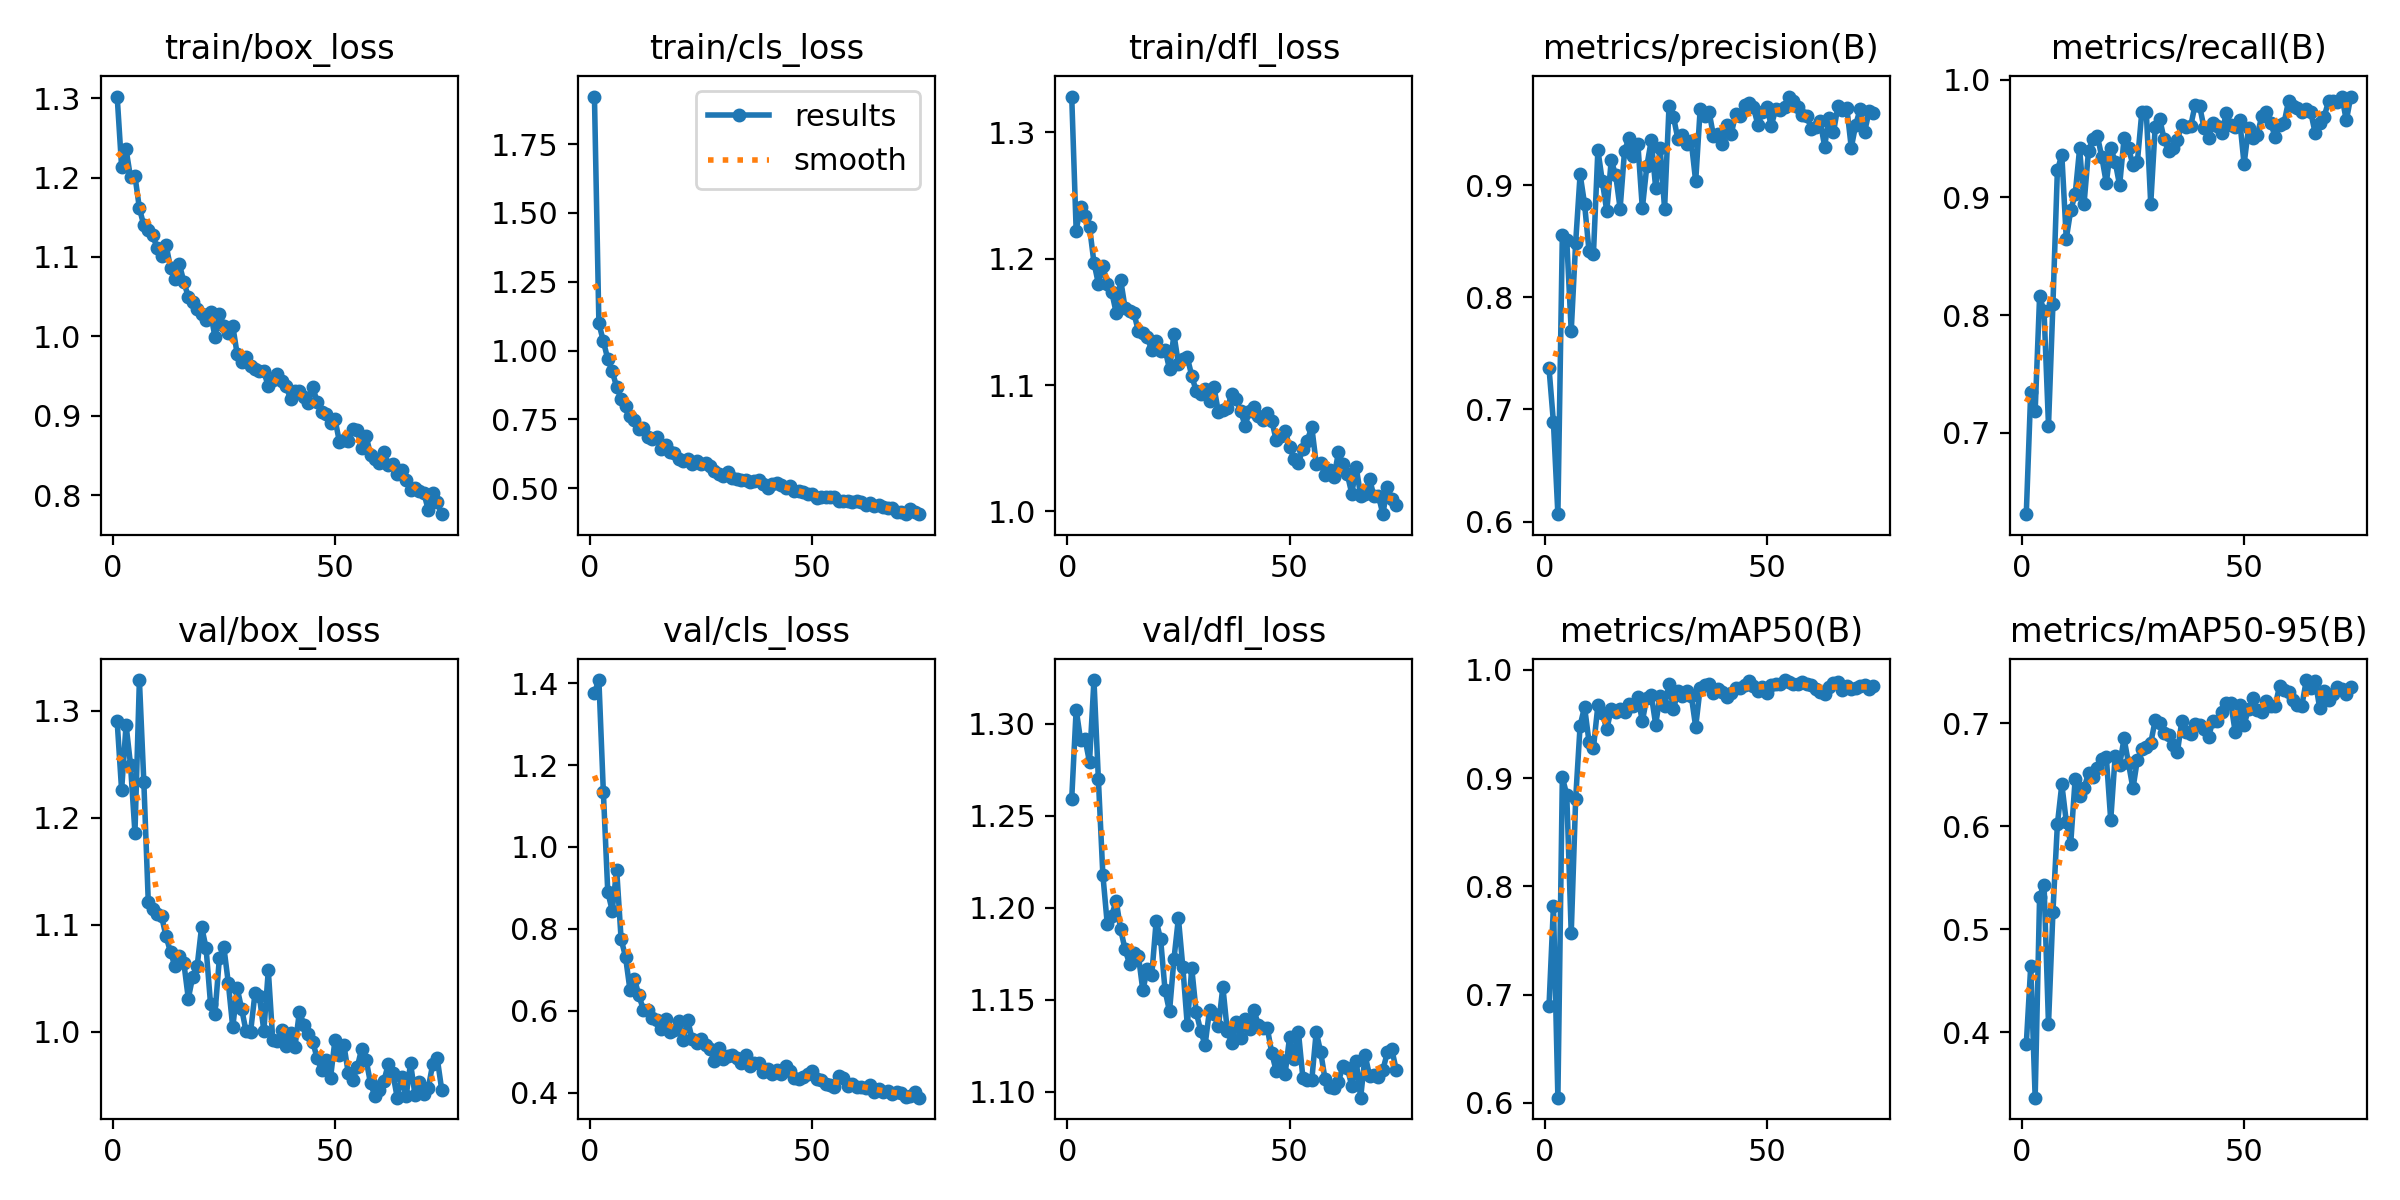

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


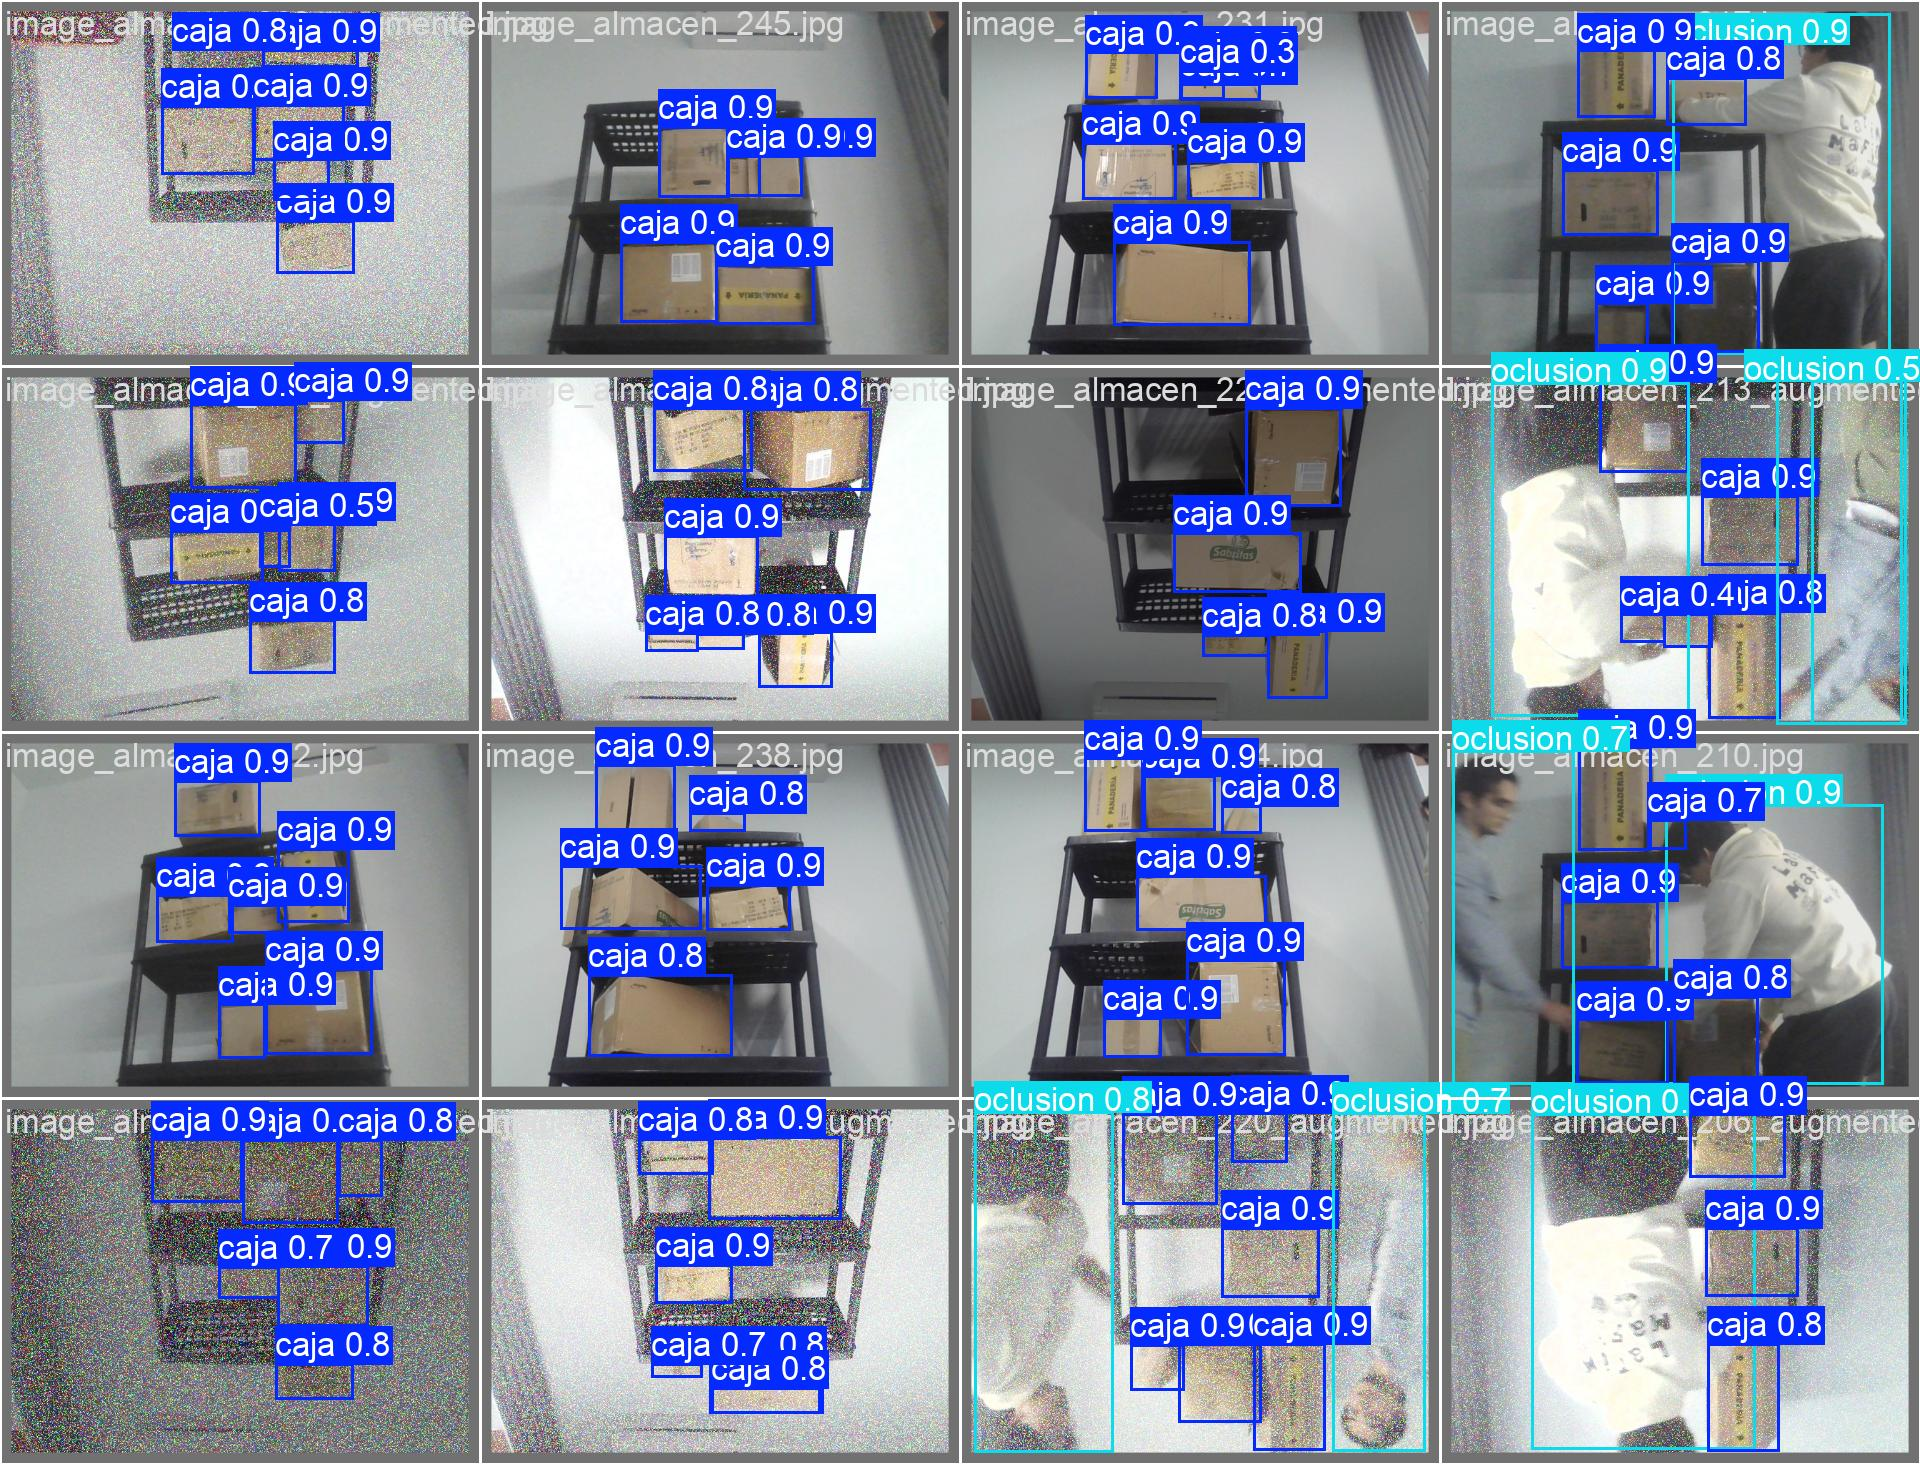

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

# Evaluación

Para medir el rendimiento del modelo con el set de prueba, se utiliza el siguiente comando:

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/Modelo_Bimbo/Dataset_cajas/data.yaml

/content
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Modelo_Bimbo/Dataset_cajas/test/test/labels... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [01:32<00:00,  1.08it/s]
val: New cache created: /content/drive/MyDrive/Modelo_Bimbo/Dataset_cajas/test/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:04<00:00,  1.43it/s]
                   all        100        569      0.934      0.969      0.979      0.729
                  caja         99        498      0.947      0.962      0.988      0.744
              oclusion         62         71       0.92      0.977       0.97      0.713
Speed: 7.6ms preprocess, 5.3ms inference, 0.0ms loss, 15.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


#Descargar resultados

Los pesos del modelo entrenado estarán en el archivo "best.pt" en la carpeta de "train/weights".

In [ ]:
!zip -r Pallets.zip runs

  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/val/ (stored 0%)
  adding: runs/detect/val/val_batch2_labels.jpg (deflated 6%)
  adding: runs/detect/val/val_batch0_pred.jpg (deflated 5%)
  adding: runs/detect/val/R_curve.png (deflated 14%)
  adding: runs/detect/val/P_curve.png (deflated 18%)
  adding: runs/detect/val/PR_curve.png (deflated 22%)
  adding: runs/detect/val/val_batch1_labels.jpg (deflated 4%)
  adding: runs/detect/val/val_batch0_labels.jpg (deflated 5%)
  adding: runs/detect/val/confusion_matrix_normalized.png (deflated 35%)
  adding: runs/detect/val/val_batch2_pred.jpg (deflated 5%)
  adding: runs/detect/val/F1_curve.png (deflated 13%)
  adding: runs/detect/val/confusion_matrix.png (deflated 38%)
  adding: runs/detect/val/val_batch1_pred.jpg (deflated 4%)
  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/train_batch2.jpg (deflated 8%)
  adding: runs/detect/train/val_batch2_labels.jpg (deflated 7%)
  adding: runs/dete

In [ ]:
import os

# Verificar si el archivo ZIP existe
zip_filename = '/content/Porterias.zip'

if os.path.exists(zip_filename):
    print("El archivo existe y está listo para descargar.")
else:
    print("El archivo no existe en la ubicación especificada.")


El archivo existe y está listo para descargar.


#Código de ejemplo

Google Colab no permite utilizar la cámara, sin embargo, podemos utilizar cualquier IDE de python para ver el desempeño de nuestro modelo en tiempo real.

In [ ]:
import cv2
from ultralytics import YOLO

# Cargar el modelo YOLOv8 (reemplaza 'best.pt' por la ruta a tu modelo)
model = YOLO("best.pt")  # Asegúrate de usar la ruta correcta a tu modelo YOLOv8

# Inicializar la cámara (usa 0 si tienes una sola cámara, o ajusta el índice si tienes varias)
cap = cv2.VideoCapture(0)

# Definir el umbral de confianza
confidence_threshold = 0.6

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Realizar la inferencia con YOLOv8 en el frame capturado, aplicando el umbral de confianza
    results = model(frame, conf=confidence_threshold)

    # Dibujar las cajas de detección en el frame
    annotated_frame = results[0].plot()  # Esto dibuja solo las detecciones con confianza >= 0.6

    # Mostrar el frame con las detecciones
    cv2.imshow("Detección YOLOv8 en Tiempo Real", annotated_frame)

    # Presiona 'q' para salir del bucle
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar la cámara y cerrar las ventanas
cap.release()
cv2.destroyAllWindows()